### Insurance Claims

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import os
import matplotlib.pyplot as plt

In [17]:
df= pd.read_excel(r"C:\Users\SkyLake\Documents\Python 2.0\KRO\notebooks\Dataset_Public_mini.xlsx")

In [3]:
df.head()

,Claim Description,Coverage Code,Accident Source
0,THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW...,AN,"Struck pedestrian, bicycle"
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN E...,GB,Elevator/Escalator
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COL...",AB,Sideswipe or lane change
3,CLAIMANT ALLEGES SHE WAS BURNED UNKNOWN DEGREE...,PA,Food Product
4,THE IV WAS MERGING INTO A CONSTRUCTION ZONE WH...,AD,Struck vehicle in rear


In [4]:
def WCplot(cl):
    colData = df[cl]
    singletxt = ''
    for mem in colData:
        singletxt += str(mem)
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(singletxt)
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.savefig('temp/WCplot.png')
    plt.show()

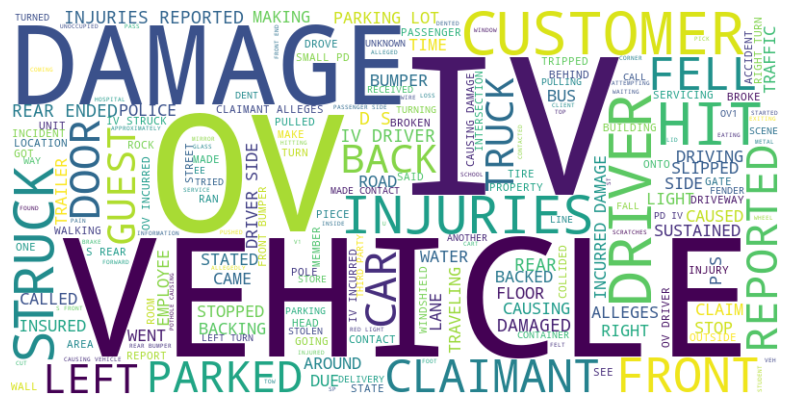

In [5]:
first_col = df.columns[0]
WCplot(first_col)

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
y = iris.target
dff = pd.DataFrame(y)
dff

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [9]:
x = iris.data

In [10]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)


In [11]:
frames = [df,dff]
dfx = pd.concat(frames,axis=1)
dfx

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
ls = [1,2,3,4,5,6,7,8,9,10,11,12]



dg = pd.DataFrame(ls)

In [13]:
os.getcwd()

'c:\\Users\\SkyLake\\Documents\\Python 2.0\\KRO\\notebooks'

In [14]:
os.chdir("c:\\Users\\SkyLake\\Documents\\Python 2.0\\KRO")

In [15]:
import sys
import os
sys.path.append(os.getcwd())
from src.components.data_viz import VizStore

ZEN


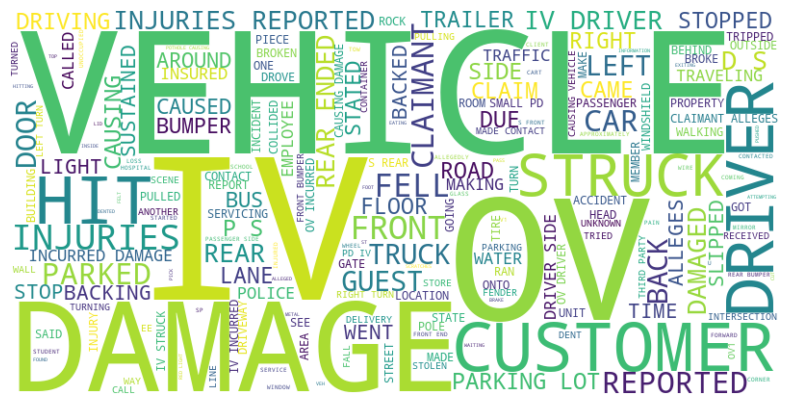

In [18]:
VizStore(df)